1. Take an input matrix with size 5x5 and a kernel with size 3x3, perform convolution with
stride being 1 and 2.

In [1]:
import numpy as np

# Define input matrix and kernel
input_matrix = np.array([[1, 0, 1, 1, 0],
                         [0, 0, 0, 1, 1],
                         [1, 0, 0, 0, 1],
                         [0, 1, 1, 1, 0],
                         [1, 1, 0, 1, 0]])

kernel = np.array([[1, 0, 0],
                   [0, 0, 1],
                   [1, 1, 0]])

def conv(X, K, stride=1):
    X_h, X_w = X.shape
    K_h, K_w = K.shape
    out_h = (X_h - K_h) // stride + 1
    out_w = (X_w - K_w) // stride + 1
    out = np.zeros((out_h, out_w))
    for i in range(out_h):
        for j in range(out_w):
            region = X[i*stride:i*stride+K_h, j*stride:j*stride+K_w]
            out[i, j] = np.sum(region * K)
    return out

conv_stride_1 = conv(input_matrix, kernel, stride=1)
conv_stride_2 = conv(input_matrix, kernel, stride=2)

print('Convolution (stride=1):\n', conv_stride_1)
print('Convolution (stride=2):\n', conv_stride_2)

Convolution (stride=1):
 [[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Convolution (stride=2):
 [[2. 2.]
 [4. 1.]]


2. Apply max-pooling, average-pooling and sum-pooling to the results from above
convolutions [Q1]

In [2]:
def pool(X, pool_size=2, mode='max', stride=1):
    h, w = X.shape
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    out = np.zeros((out_h, out_w))
    for i in range(out_h):
        for j in range(out_w):
            region = X[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            if mode == 'max':
                out[i, j] = np.max(region)
            elif mode == 'avg':
                out[i, j] = np.mean(region)
            elif mode == 'sum':
                out[i, j] = np.sum(region)
    return out

# added a zero padding to conv_stride_1 to make it 4x4 for non-overlapping pooling
conv_stride_1_padded = np.pad(conv_stride_1, ((0,1),(0,1)), mode='constant')

max_pool_1 = pool(conv_stride_1_padded, pool_size=2, mode='max', stride=2)
avg_pool_1 = pool(conv_stride_1_padded, pool_size=2, mode='avg', stride=2)
sum_pool_1 = pool(conv_stride_1_padded, pool_size=2, mode='sum', stride=2)

# pooling for stride=2 convolution
max_pool_2 = pool(conv_stride_2, pool_size=2, mode='max')
avg_pool_2 = pool(conv_stride_2, pool_size=2, mode='avg')
sum_pool_2 = pool(conv_stride_2, pool_size=2, mode='sum')

print('Max Pool (stride=1):\n', max_pool_1)
print('Avg Pool (stride=1):\n', avg_pool_1)
print('Sum Pool (stride=1):\n', sum_pool_1)

print('Max Pool (stride=2):\n', max_pool_2)
print('Avg Pool (stride=2):\n', avg_pool_2)
print('Sum Pool (stride=2):\n', sum_pool_2)

Max Pool (stride=1):
 [[2. 3.]
 [4. 1.]]
Avg Pool (stride=1):
 [[1.5  1.25]
 [1.5  0.25]]
Sum Pool (stride=1):
 [[6. 5.]
 [6. 1.]]
Max Pool (stride=2):
 [[4.]]
Avg Pool (stride=2):
 [[2.25]]
Sum Pool (stride=2):
 [[9.]]


3. Visualize the flattened version of the pooled feature maps from [Q2]

In [ ]:
import matplotlib.pyplot as plt

# Flatten pooled feature maps
flat_max_pool_1 = max_pool_1.flatten()
flat_avg_pool_1 = avg_pool_1.flatten()
flat_sum_pool_1 = sum_pool_1.flatten()

flat_max_pool_2 = max_pool_2.flatten()
flat_avg_pool_2 = avg_pool_2.flatten()
flat_sum_pool_2 = sum_pool_2.flatten()

print('Flattened Max Pool (stride=1):', flat_max_pool_1)
print('Flattened Avg Pool (stride=1):', flat_avg_pool_1)
print('Flattened Sum Pool (stride=1):', flat_sum_pool_1)

print('Flattened Max Pool (stride=2):', flat_max_pool_2)
print('Flattened Avg Pool (stride=2):', flat_avg_pool_2)
print('Flattened Sum Pool (stride=2):', flat_sum_pool_2)

Flattened Max Pool (stride=1): [2. 3. 4. 1.]
Flattened Avg Pool (stride=1): [1.5  1.25 1.5  0.25]
Flattened Sum Pool (stride=1): [6. 5. 6. 1.]
Flattened Max Pool (stride=2): [4.]
Flattened Avg Pool (stride=2): [2.25]
Flattened Sum Pool (stride=2): [9.]


4. With weights being randomly chosen and bias being 1, learn the weights and bias over an
epoch for the flattened arrays from [Q3]

In [4]:
np.random.seed(42)
x = flat_max_pool_1
w = np.random.randn(len(x))
b = 1.0
target = np.ones_like(x)  # dummy target 
lr = 0.01
epochs = 15

for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(x, w) + b
    loss = np.mean((y_pred - target)**2)
    
    # Backward pass - gradient descent
    grad_w = 2 * (y_pred - target) * x / len(x)
    grad_b = 2 * (y_pred - target) / len(x)
    
    w -= lr * grad_w
    b -= lr * grad_b
    
    print(f'Epoch {epoch+1}: Loss={loss}, Weights={w}, Bias={b}')

Epoch 1: Loss=22.01879993172998, Weights=[ 0.44978996 -0.20865059  0.55384015  1.49956776], Bias=[0.9765379 0.9765379 0.9765379 0.9765379]
Epoch 2: Loss=15.721973621253504, Weights=[ 0.41013901 -0.26812701  0.47453826  1.47974229], Bias=[0.95671243 0.95671243 0.95671243 0.95671243]
Epoch 3: Loss=11.225882214915531, Weights=[ 0.37663397 -0.31838458  0.40752817  1.46298976], Bias=[0.93995991 0.93995991 0.93995991 0.93995991]
Epoch 4: Loss=8.015560548505062, Weights=[ 0.3483222  -0.36085223  0.35090464  1.44883388], Bias=[0.92580402 0.92580402 0.92580402 0.92580402]
Epoch 5: Loss=5.723310620646326, Weights=[ 0.32439876 -0.39673739  0.30305775  1.43687216], Bias=[0.9138423 0.9138423 0.9138423 0.9138423]
Epoch 6: Loss=4.0865868659069955, Weights=[ 0.30418345 -0.42706035  0.26262714  1.42676451], Bias=[0.90373465 0.90373465 0.90373465 0.90373465]
Epoch 7: Loss=2.917925186929242, Weights=[ 0.28710152 -0.45268326  0.22846327  1.41822354], Bias=[0.89519368 0.89519368 0.89519368 0.89519368]
Epoc

5. Design and implement a Convolutional Neural Network (CNN) to classify images from
MNIST, CIFAR-10 dataset.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
# MNIST Model
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

model_mnist = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_mnist.fit(x_train, y_train, epochs=3, validation_split=0.1)
test_loss, test_acc = model_mnist.evaluate(x_test, y_test)
print('MNIST Test accuracy:', test_acc)

c:\Users\joela\Software_Projects\Neural Networks\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9469 - loss: 0.1816 - val_accuracy: 0.9815 - val_loss: 0.0647
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9469 - loss: 0.1816 - val_accuracy: 0.9815 - val_loss: 0.0647
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9815 - loss: 0.0629 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9815 - loss: 0.0629 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9872 - val_loss: 0.0490
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9872 - val_loss: 0.0490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0532
MNIST Test accuracy: 0.9833999872207642
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0532
MNIST Test accuracy: 0.9833999872207642


In [7]:
# CIFAR-10 Model
cifar10 = tf.keras.datasets.cifar10
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()
x_train_c = x_train_c / 255.0
x_test_c = x_test_c / 255.0

model_cifar = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_cifar.fit(x_train_c, y_train_c, epochs=5, validation_split=0.1)
test_loss_c, test_acc_c = model_cifar.evaluate(x_test_c, y_test_c)
print('CIFAR-10 Test accuracy:', test_acc_c)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.4802 - loss: 1.4393 - val_accuracy: 0.6122 - val_loss: 1.0872
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.4802 - loss: 1.4393 - val_accuracy: 0.6122 - val_loss: 1.0872
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.6469 - loss: 1.0013 - val_accuracy: 0.6934 - val_loss: 0.8863
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.6469 - loss: 1.0013 - val_accuracy: 0.6934 - val_loss: 0.8863
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.7076 - loss: 0.8357 - val_accuracy: 0.7140 - val_loss: 0.8191
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.7076 - loss: 0.8357 - val_accuracy: 0.7140 - val_loss: 0.8191
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7476 - loss: 0.7277 - val_accuracy: 0.7204 - val_loss: 0.8056
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7476 - loss: 0

# testing the models

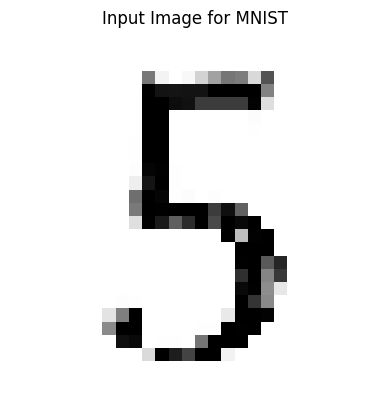

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted digit: 5
Predicted digit: 5


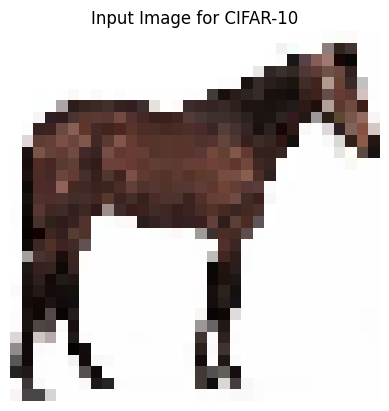

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted class: horse
Predicted class: horse


In [19]:
import cv2
from matplotlib import pyplot as plt

# MNIST Image Classification Test
def test_mnist_image(model):
    img_path = input('Enter path to a grayscale digit image: ')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (28, 28))
    plt.imshow(img_resized, cmap='gray')
    plt.title('Input Image for MNIST')
    plt.axis('off')
    plt.show()
    img_array = img_resized.astype('float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    pred = model.predict(img_array)
    print('Predicted digit:', pred.argmax())

# CIFAR-10 Image Classification Test
def test_cifar10_image(model):
    img_path = input('Enter path to a color image: ')
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (32, 32))
    plt.imshow(img_resized)
    plt.title('Input Image for CIFAR-10')
    plt.axis('off')
    plt.show()
    img_array = img_resized.astype('float32') / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)
    pred = model.predict(img_array)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print('Predicted class:', class_names[pred.argmax()])

test_mnist_image(model_mnist)
test_cifar10_image(model_cifar)